### №1 Section for importing libraries and reading data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), 'bin_data')
spectra_path = os.path.join(work_dir_path, 'data.npy')
labels_path = os.path.join(work_dir_path, 'labels.npy')
spectra = np.load(spectra_path)
labels = np.load(labels_path)

In [ ]:
### №2 Section for visualizing input data

In [ ]:
def plot_spectra(spectra, labels):
    unique_labels = np.unique(labels)

    fig = plt.figure(figsize=(15, 7), dpi=100)
    plt.ylabel('Absorption', fontsize=10)
    plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    c = 1
    for label in unique_labels:
        label_indices = (labels[:] == label)
        label_spectra = spectra[label_indices]
        
        for spectrum in label_spectra:
            plt.plot(range(0, len(spectrum)), spectrum, color=colors[len(colors) % c], label=label)
        c += 1

    legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
    handle_by_label = dict(zip(legend_labels, legend_handles))
    plt.legend(handle_by_label.values(), handle_by_label.keys()) 
    plt.show()

    return

plot_spectra(spectra, labels)

In [12]:
### №3 Section for noise removal based on bilateral filter

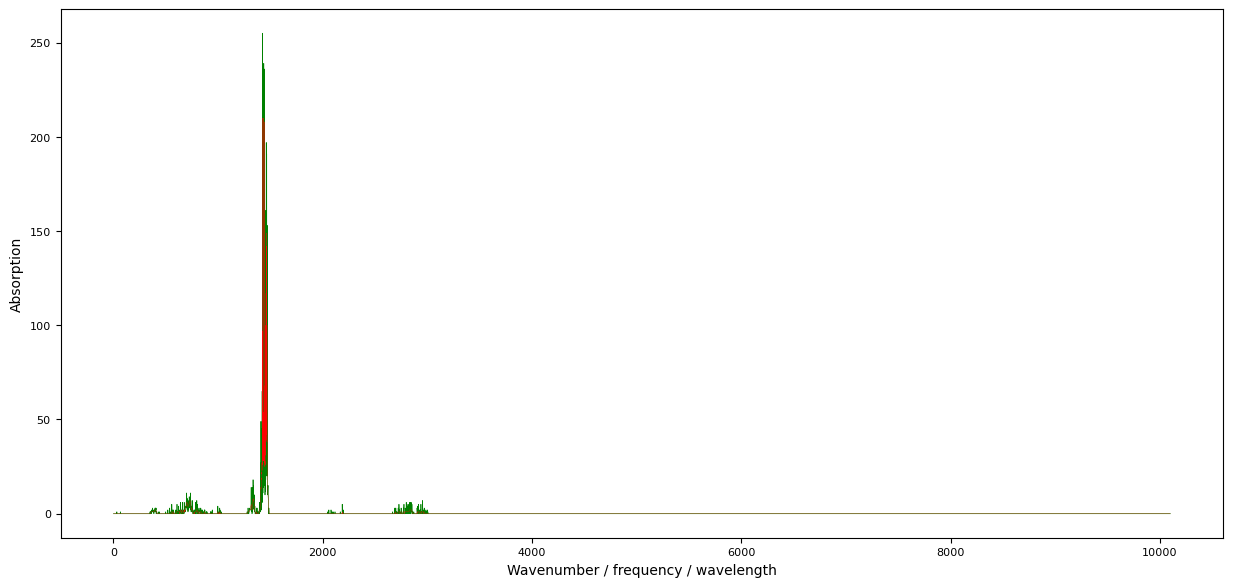

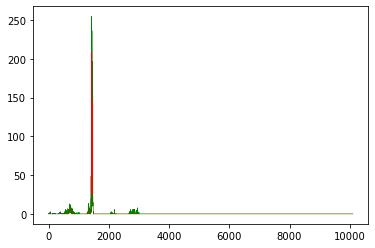

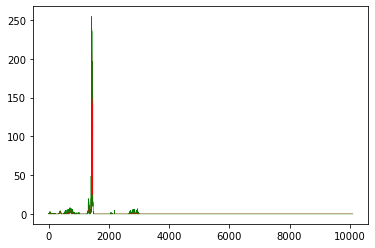

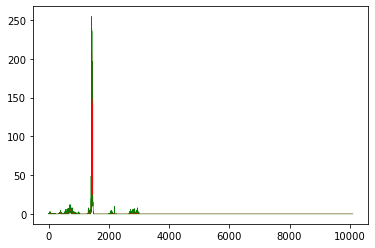

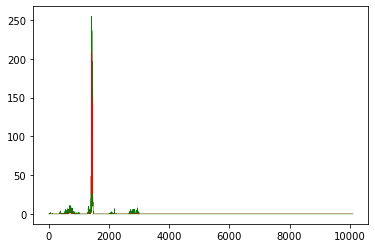

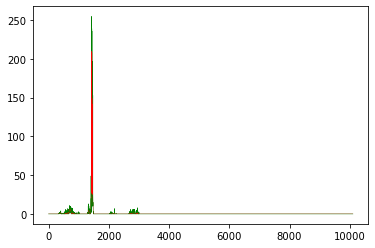

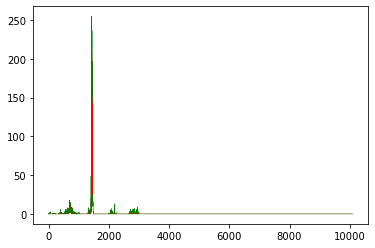

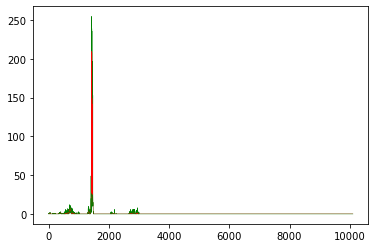

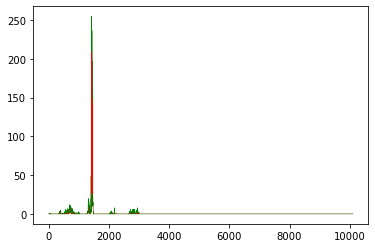

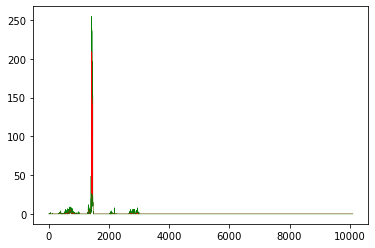

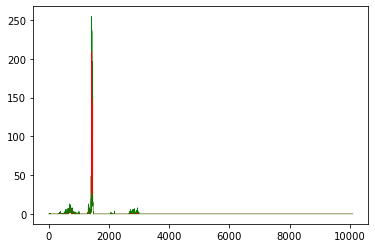

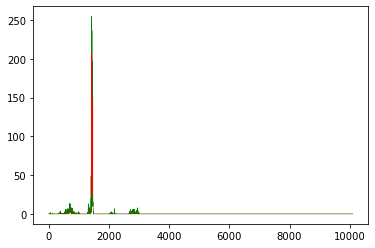

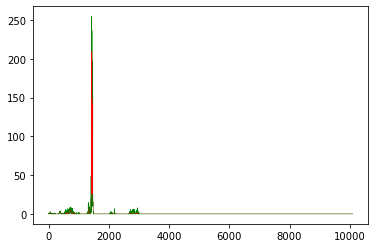

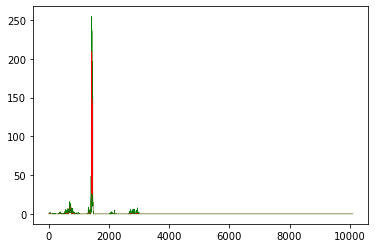

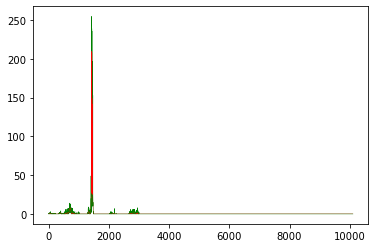

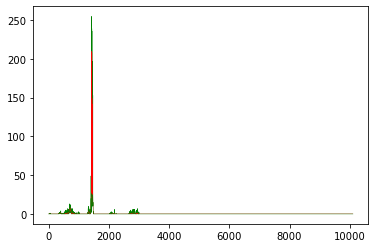

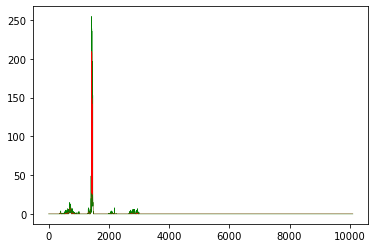

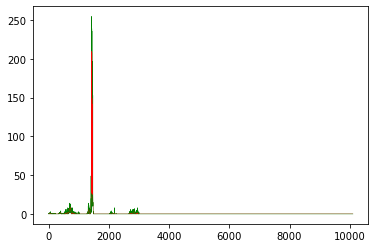

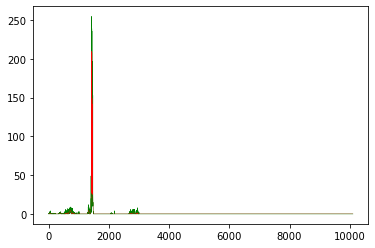

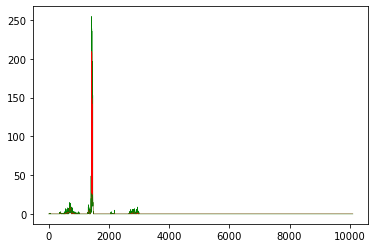

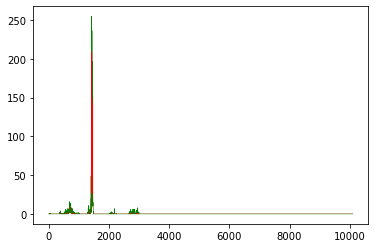

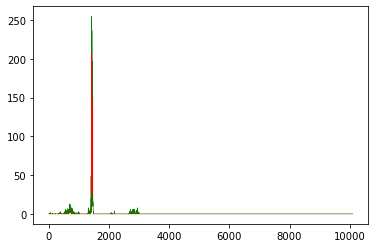

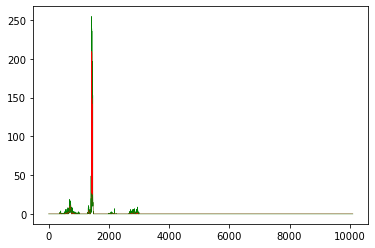

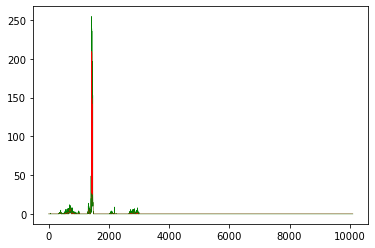

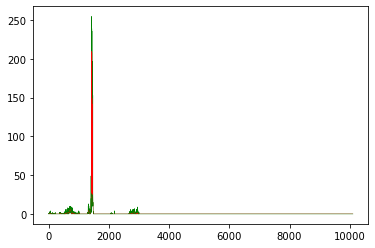

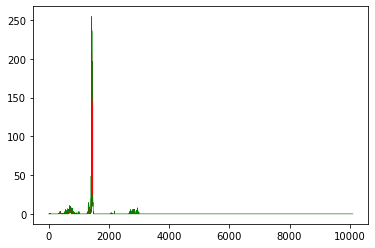

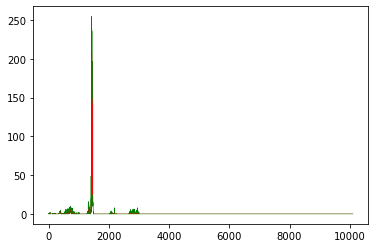

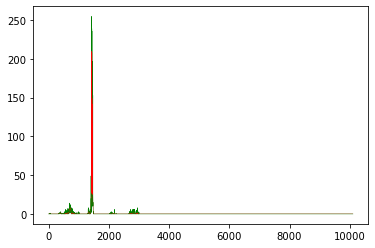

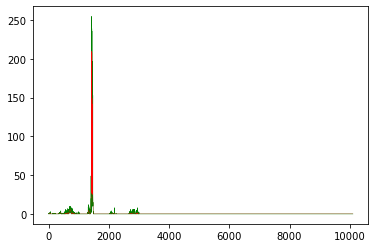

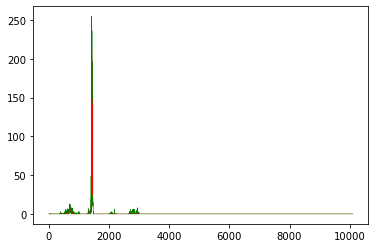

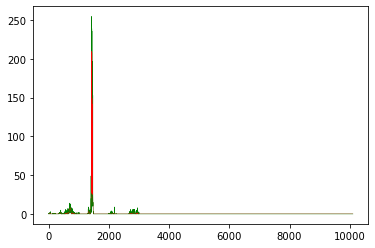

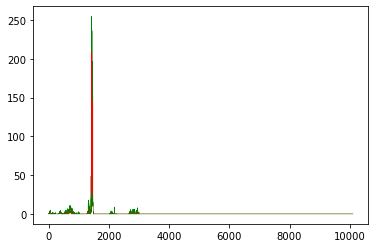

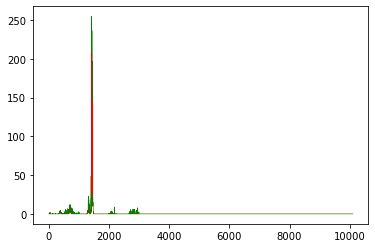

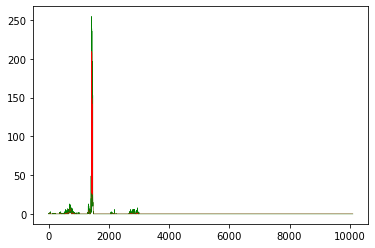

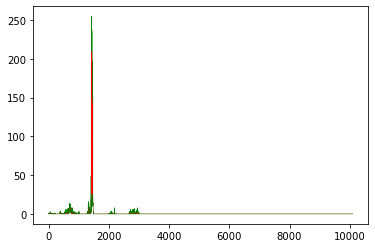

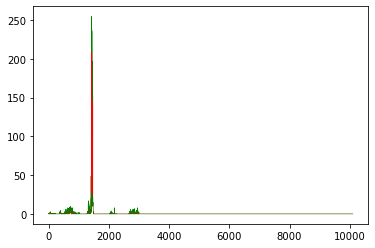

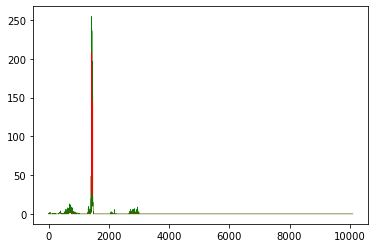

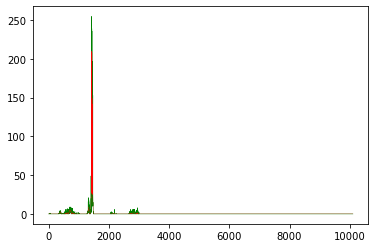

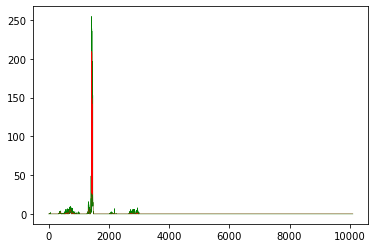

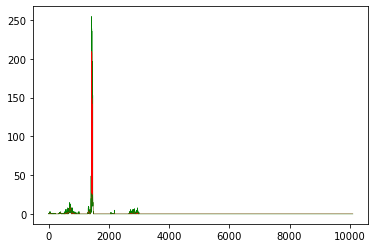

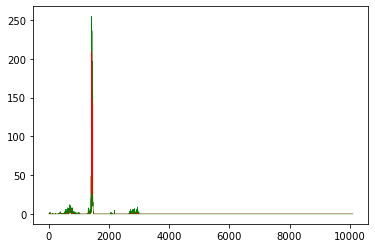

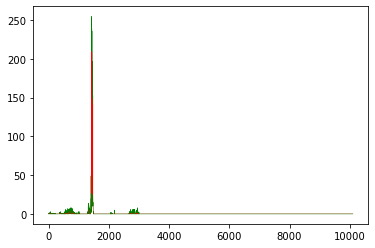

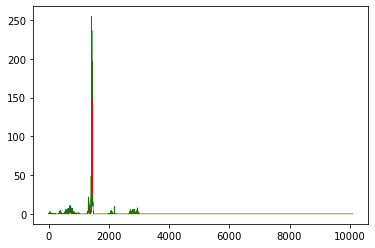

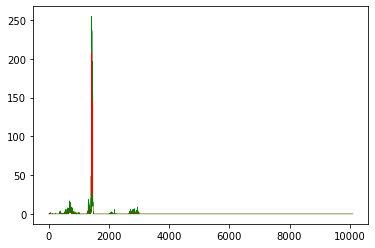

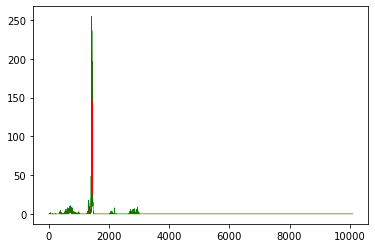

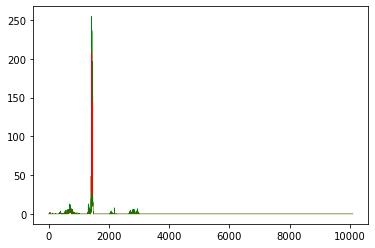

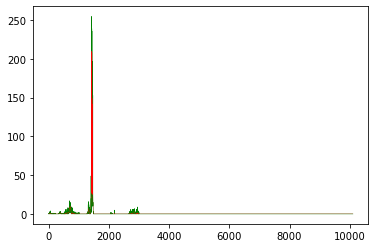

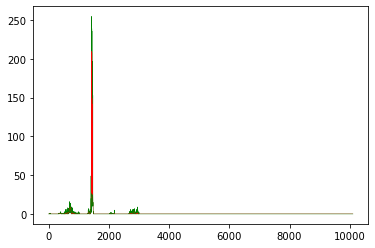

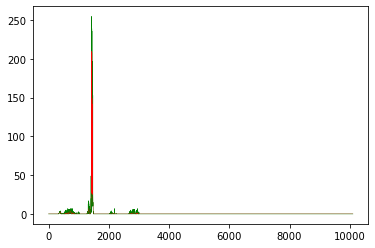

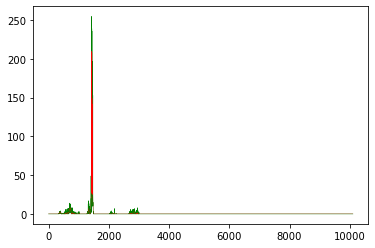

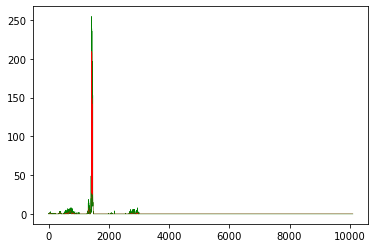

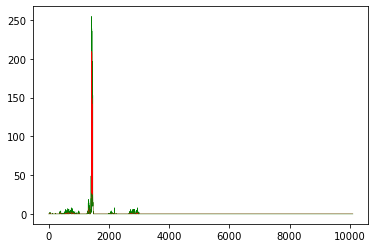

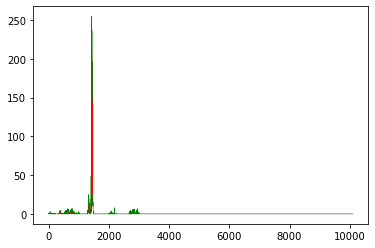

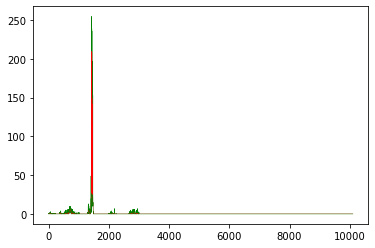

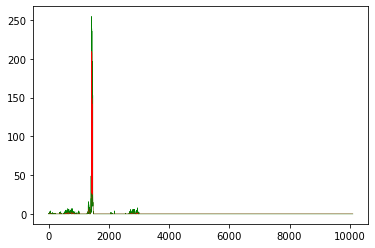

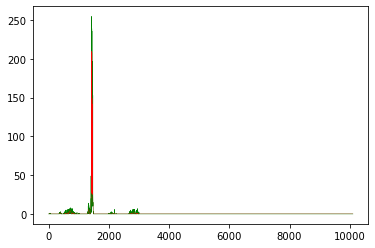

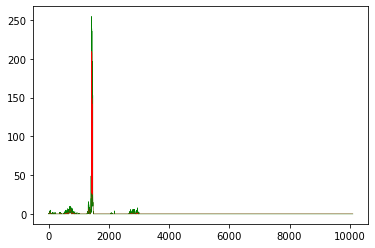

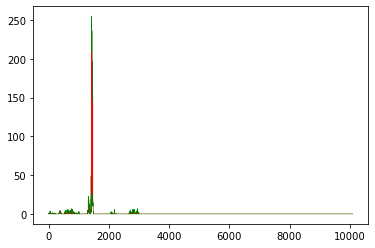

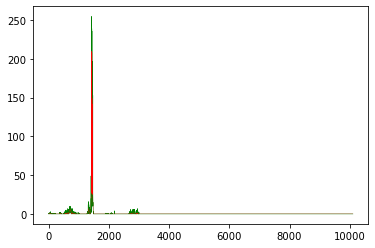

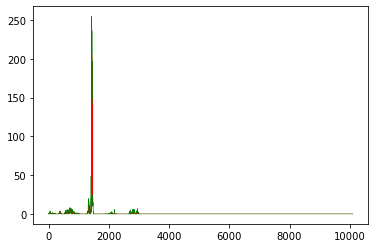

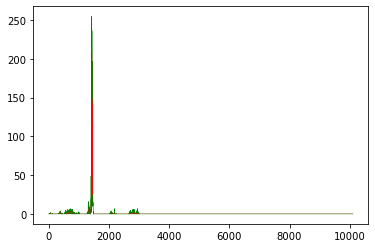

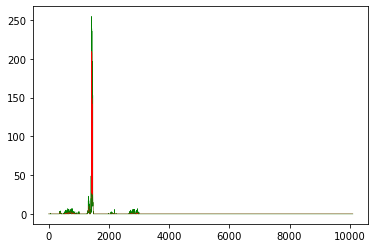

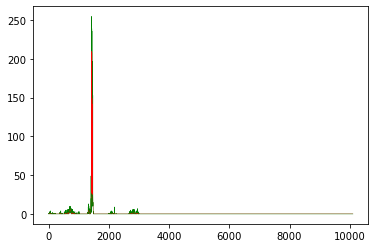

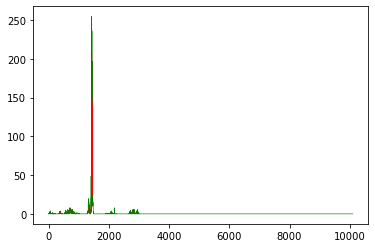

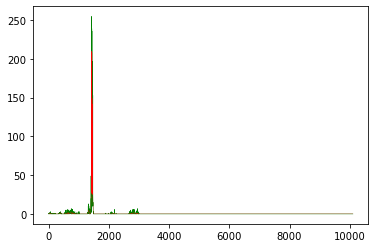

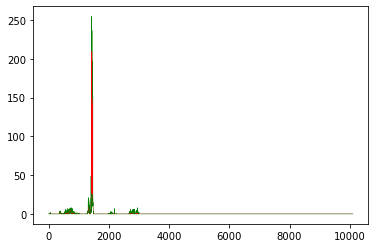

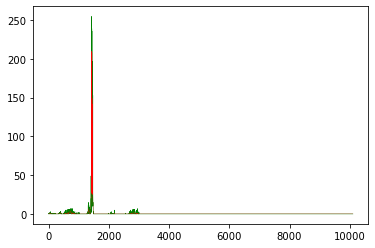

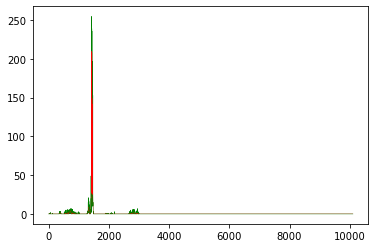

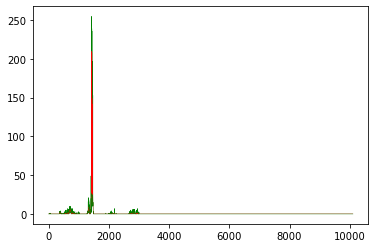

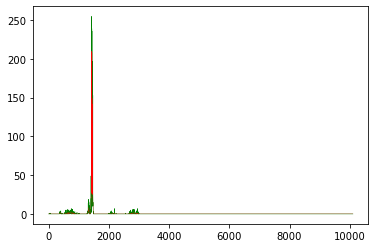

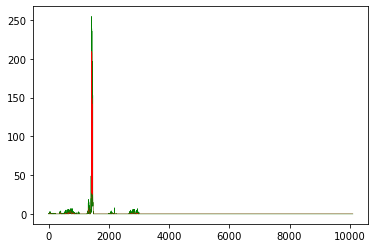

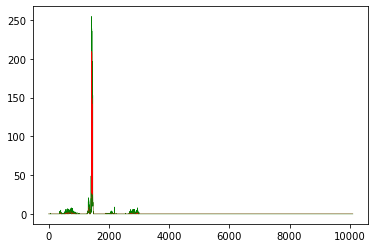

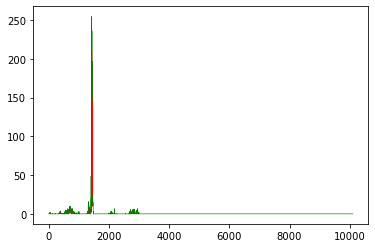

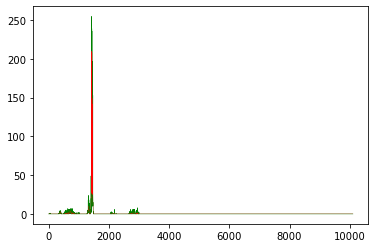

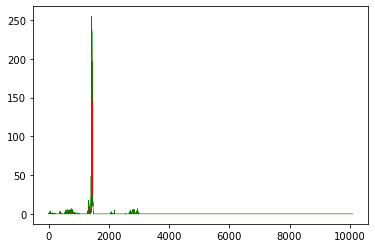

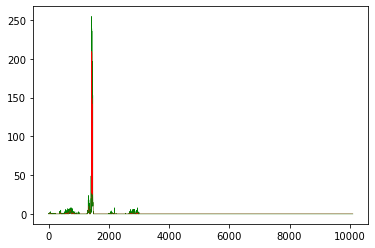

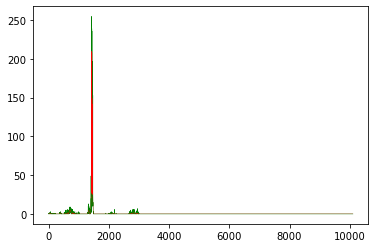

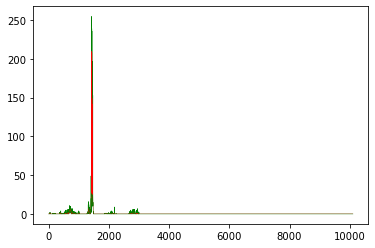

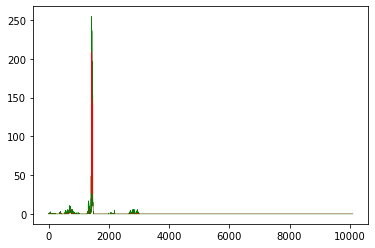

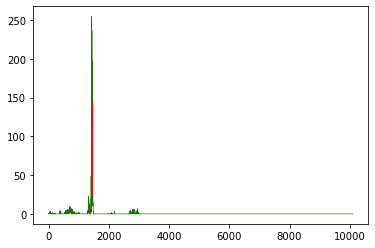

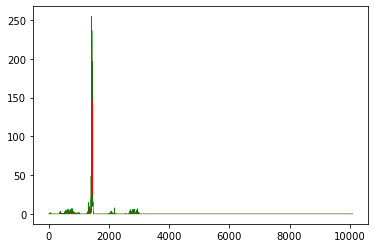

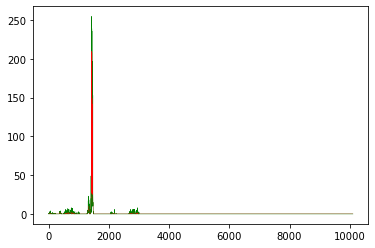

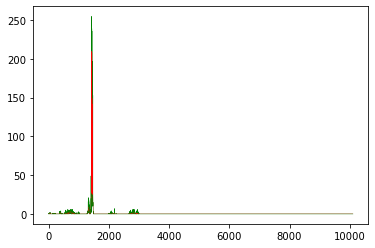

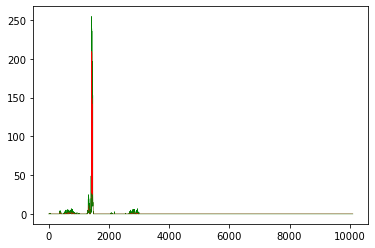

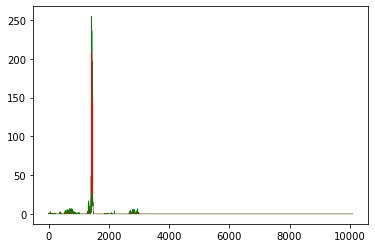

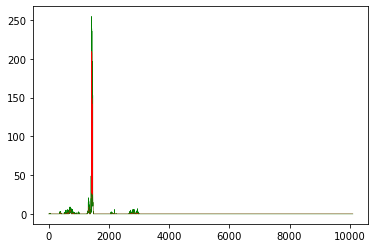

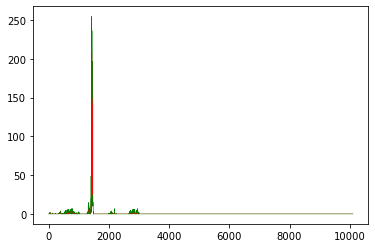

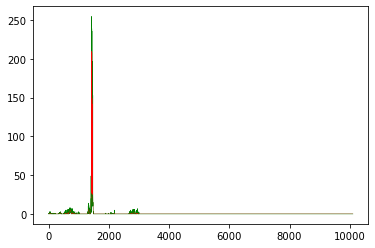

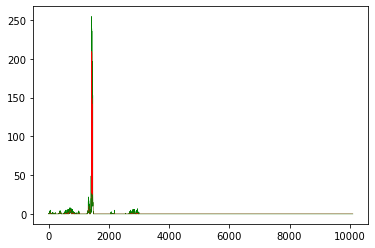

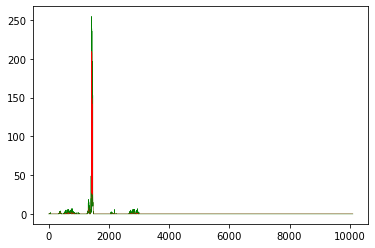

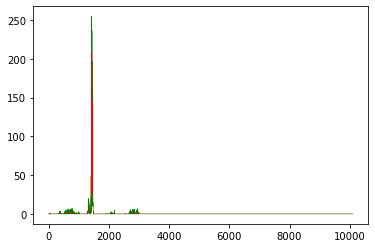

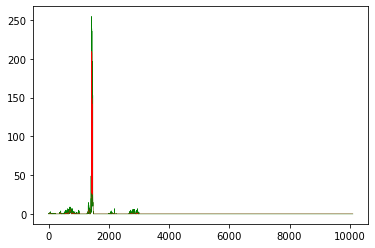

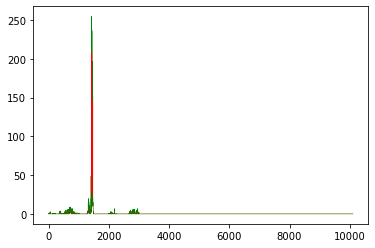

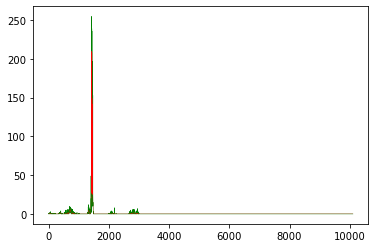

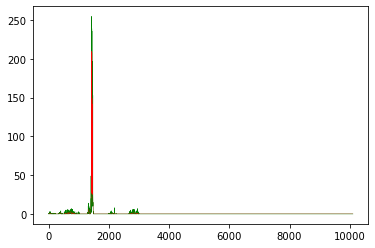

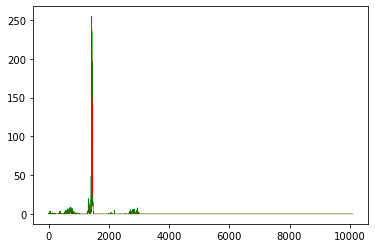

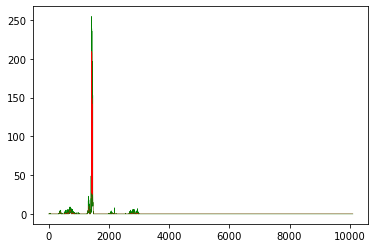

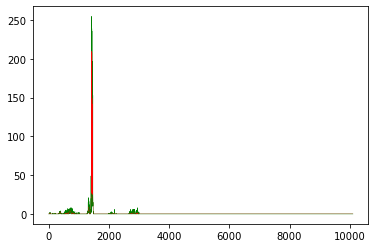

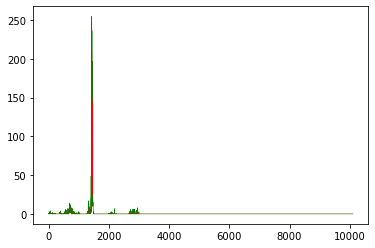

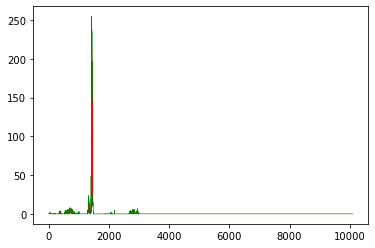

In [19]:
fig = plt.figure(figsize=(15, 7), dpi=100)
plt.ylabel('Absorption', fontsize=10)
plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#Apply bilatering filter for each spectrum in the dataset
for spectrum in spectra:   
    max_value = max(spectrum)
    normed_spectrum = spectrum / max_value * 255
    filtered = cv2.bilateralFilter(np.uint8(normed_spectrum.reshape(len(normed_spectrum),1)), 15, 75, 75)
    plt.plot(np.uint8(normed_spectrum),'green',linewidth=0.5)
    plt.plot(filtered,'red',linewidth=0.2)
    plt.show()